# RandomForest with GridSearch

### This notebook is meant for testing Random Forest algoritmn as classificator. See DataProcessing for the previous steps on the data pre-processing.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve, learning_curve
from sklearn.ensemble import RandomForestClassifier

from my_lib.plotting import (
    plot_probability_distributions,
    plot_learning_curve,
    plot_validation_curve,
    plot_feature_importance
)

In [2]:
plt.rcParams.update({'font.size': 16})

In [3]:
data = pd.read_csv('data/titanic_newAge_withEncoded.csv')

In [4]:
# Data preparation
X = data.drop(columns=['Unnamed: 0', 'PassengerId', 'Survived'])
y = data['Survived']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [6]:
clf = RandomForestClassifier(random_state=1, max_depth=5, criterion='entropy')

In [7]:
clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, random_state=1)

In [8]:
test_score = clf.score(X_test, y_test)
print('Test Sample Score: {:.4f}'.format(test_score))

Test Sample Score: 0.8090


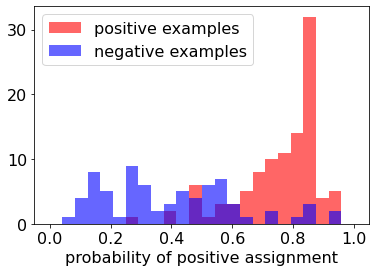

In [9]:
plot_probability_distributions(clf, X_test, y_test)

### Learning Curve

In [10]:
train_sizes, train_scores, test_scores = learning_curve(
    clf,
    X_train,
    y_train,
    train_sizes=np.linspace(0.1, 1, 10),
    cv=5
)

Validation Test Score = 0.803 +/- 0.024


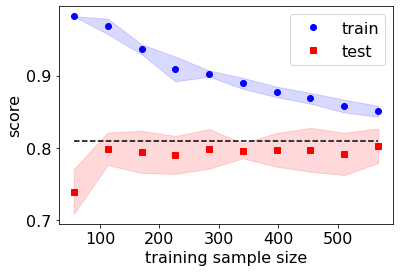

In [11]:
test_score, test_score_error = \
    plot_learning_curve(train_scores, test_scores, train_sizes, expected_score=test_score, stat_error=False)

print('Validation Test Score = {:.3f} +/- {:.3f}'.format(test_score, test_score_error))

***
The learning curve indicates a convergence between train and test score, meaning that the sample size is sufficiently large to prevent overfitting.  
***

### Feature Importances

<AxesSubplot:>

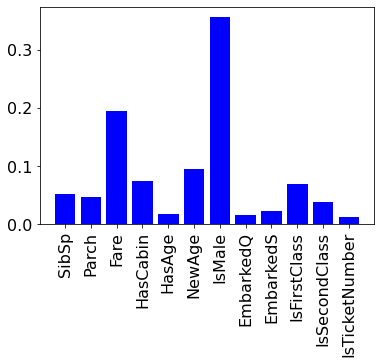

In [12]:
plot_feature_importance(clf.feature_importances_, X.columns, color='b')

### Validation Curve (param: max_depth)

In [13]:
param_range = range(2, 10)
train_scores, test_scores = validation_curve(
    estimator=clf, 
    X=X_train, 
    y=y_train, 
    param_name='max_depth', 
    param_range=param_range,
    cv=5
)

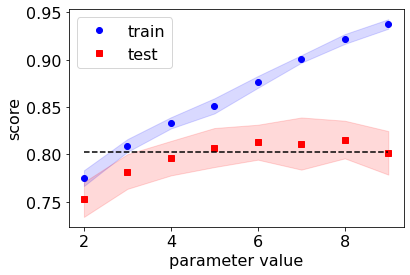

In [14]:
plot_validation_curve(train_scores, test_scores, param_range, expected_score=test_score, stat_error=False)

***
Train and test scores increase together up to max_depth~5. Above that, the train score continue increases and the test score reaches a plateau. This indicates that for max_depth > 5 the classificator starts overfitting the data. The optimal value of max_depth should then be around 4 or 5.
***

### GridSearch

Here we will test a GridSearch in order to find the best set of hyperparameters for the Random Forest classifier.

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [17]:
parameters = {
    'n_estimators':[100, 125, 150, 175, 200, 250],
    'class_weight': [None, 'balanced'],
    'criterion': ['entropy', 'gini'],
    'max_depth': [4, 5, 6],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [18]:
gs = GridSearchCV(
    clf,
    param_grid=parameters,
    n_jobs=5,
    return_train_score=True
)
gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(criterion='entropy', max_depth=5,
                                              random_state=1),
             n_jobs=5,
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['entropy', 'gini'],
                         'max_depth': [4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 125, 150, 175, 200, 250]},
             return_train_score=True)

In [23]:
print('Best Score: {:.4f}'.format(gs.best_score_))
print('Best Parameters: ', gs.best_params_)

Best Score: 0.8171
Best Parameters:  {'class_weight': None, 'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 175}


In [20]:
best_clf = gs.best_estimator_

### Validation Curve (param: n_estimators)

In [21]:
param_range = [10, 30, 60, 80, 100, 125, 150, 175, 200, 225, 250, 275, 300]
train_scores, test_scores = validation_curve(
    estimator=best_clf, 
    X=X_train,
    y=y_train,
    param_name='n_estimators', 
    param_range=param_range,
    cv=5
)

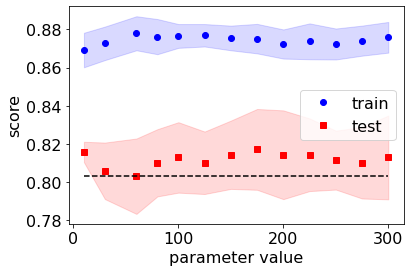

In [22]:
plot_validation_curve(train_scores, test_scores, param_range, expected_score=test_score, stat_error=False)